In [1]:
import pandas as pd
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt 
import seaborn as sns

load_dotenv()

DB_URL = os.getenv("DATABASE_URL")

engine = create_engine(DB_URL)


df = pd.read_sql("SELECT * FROM weather_data", engine)
df['timestamp'] = df['timestamp'].dt.tz_convert('Asia/Kolkata')
df.head()


,id,city,timestamp,temperature,humidity,wind_speed,pm10,pm2_5,nitrogen_dioxide,ozone
0,1,Ahmedabad,2025-11-16 00:16:38.567400+05:30,20.2,46.0,3.500000,35.85,34.75,26.85,72.0
1,2,Bengaluru,2025-11-16 00:16:38.376559+05:30,20.2,88.0,2.888889,44.85,43.15,36.95,53.0
2,3,Bhopal,2025-11-16 00:16:38.737303+05:30,18.0,28.0,2.000000,56.95,50.35,20.45,76.0
3,4,Chennai,2025-11-16 00:16:38.355079+05:30,27.0,84.0,5.611111,59.25,50.05,8.05,113.0
4,5,Dehradun,2025-11-16 00:16:38.785387+05:30,11.4,55.0,2.194444,53.05,51.85,34.55,105.0


In [2]:
df.describe()

,id,temperature,humidity,wind_speed,pm10,pm2_5,nitrogen_dioxide,ozone
count,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000
mean,420.500000,21.024405,53.148810,2.954497,62.048690,59.201548,23.064643,95.119048
std,242.631408,5.042287,20.153475,1.542236,31.647833,30.997708,18.765696,50.152569
min,1.000000,10.700000,15.000000,1.000000,5.950000,4.650000,0.850000,5.000000
25%,210.750000,17.100000,37.000000,1.888889,42.625000,40.125000,9.650000,59.000000
50%,420.500000,21.150000,50.000000,2.694444,55.000000,52.050000,20.050000,84.000000
75%,630.250000,25.300000,69.000000,3.611111,69.450000,66.600000,31.825000,126.250000
max,840.000000,33.400000,100.000000,9.000000,203.850000,202.050000,136.850000,305.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype                       
---  ------            --------------  -----                       
 0   id                840 non-null    int64                       
 1   city              840 non-null    object                      
 2   timestamp         840 non-null    datetime64[ns, Asia/Kolkata]
 3   temperature       840 non-null    float64                     
 4   humidity          840 non-null    float64                     
 5   wind_speed        840 non-null    float64                     
 6   pm10              840 non-null    float64                     
 7   pm2_5             840 non-null    float64                     
 8   nitrogen_dioxide  840 non-null    float64                     
 9   ozone             840 non-null    float64                     
dtypes: datetime64[ns, Asia/Kolkata](1), float64(7), int64(1), object(1)
memory

In [4]:
df.isnull().sum()

id                  0
city                0
timestamp           0
temperature         0
humidity            0
wind_speed          0
pm10                0
pm2_5               0
nitrogen_dioxide    0
ozone               0
dtype: int64

In [5]:
numeric_cols = ["temperature","humidity","wind_speed","pm10","pm2_5","nitrogen_dioxide","ozone"]

df[numeric_cols] = df.groupby("city")[numeric_cols].transform(
    lambda x: x.interpolate(method="linear", limit_direction="both")
)

In [6]:
df.isnull().sum()

id                  0
city                0
timestamp           0
temperature         0
humidity            0
wind_speed          0
pm10                0
pm2_5               0
nitrogen_dioxide    0
ozone               0
dtype: int64

In [7]:
df.nunique()

id                  840
city                 15
timestamp           840
temperature         164
humidity             74
wind_speed           67
pm10                439
pm2_5               437
nitrogen_dioxide    398
ozone               205
dtype: int64

In [8]:
df_min_pm10 = pd.read_sql("""
SELECT city , MIN(pm10) AS min_pm10
FROM weather_data
GROUP BY city
ORDER BY min_pm10
LIMIT 5
""", engine)


In [9]:
df_max_pm10 = pd.read_sql("""
SELECT city , Max(pm10) AS max_pm10
FROM weather_data
GROUP BY city
ORDER BY max_pm10 DESC
LIMIT 5
""", engine)

In [10]:
df_max_pm2_5 = pd.read_sql("""
SELECT city , MAX(pm2_5) AS max_pm2_5
FROM weather_data
GROUP BY city
ORDER BY max_pm2_5 DESC
LIMIT 5
""", engine)


In [11]:
df_min_pm2_5 = pd.read_sql("""
SELECT city , MIN(pm2_5) AS min_pm2_5
FROM weather_data
GROUP BY city
ORDER BY min_pm2_5
LIMIT 5
""", engine)


In [12]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric.corr()

,id,temperature,humidity,wind_speed,pm10,pm2_5,nitrogen_dioxide,ozone
id,1.000000,0.026349,-0.000182,-0.022121,0.011611,0.040879,0.066099,-0.035179
temperature,0.026349,1.000000,-0.371558,0.477029,-0.136881,-0.146280,-0.404436,0.368722
humidity,-0.000182,-0.371558,1.000000,0.202766,0.158284,0.149802,0.173951,-0.121912
wind_speed,-0.022121,0.477029,0.202766,1.000000,-0.254920,-0.274099,-0.343002,0.186891
pm10,0.011611,-0.136881,0.158284,-0.254920,1.000000,0.997443,0.598176,-0.244738
pm2_5,0.040879,-0.146280,0.149802,-0.274099,0.997443,1.000000,0.620049,-0.262327
nitrogen_dioxide,0.066099,-0.404436,0.173951,-0.343002,0.598176,0.620049,1.000000,-0.573440
ozone,-0.035179,0.368722,-0.121912,0.186891,-0.244738,-0.262327,-0.573440,1.000000


# "Correlation between different variables"

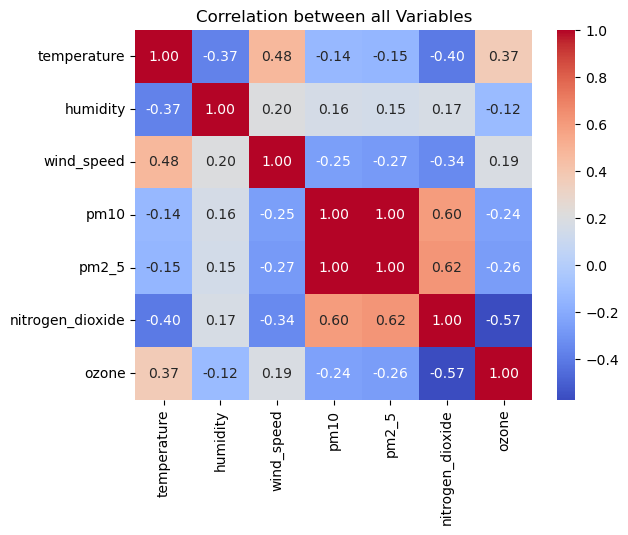

In [13]:
num_columns = ['temperature','humidity','wind_speed','pm10','pm2_5','nitrogen_dioxide','ozone']

sns.heatmap(df[num_columns].corr(), annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Correlation between all Variables')
plt.show()


# "Boxplot of all Numeric Columns"

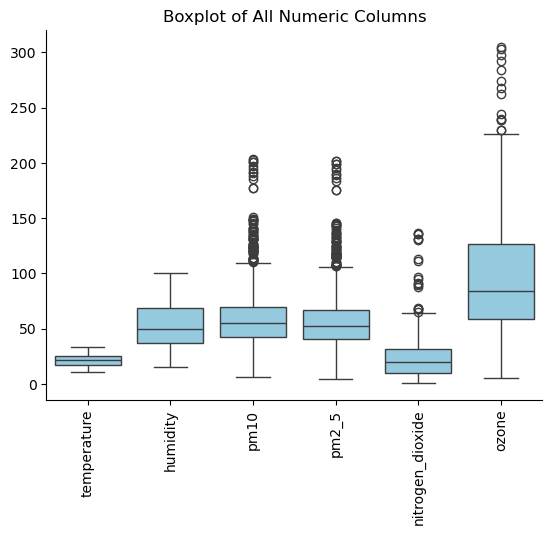

In [14]:
num_columns = ['temperature','humidity','pm10','pm2_5','nitrogen_dioxide','ozone']

sns.boxplot(data=df[num_columns],color='skyblue')
plt.xticks(rotation=90)
plt.title('Boxplot of All Numeric Columns')
sns.despine()
plt.show()

# "MIN & MAX PM10 AND PM2.5"

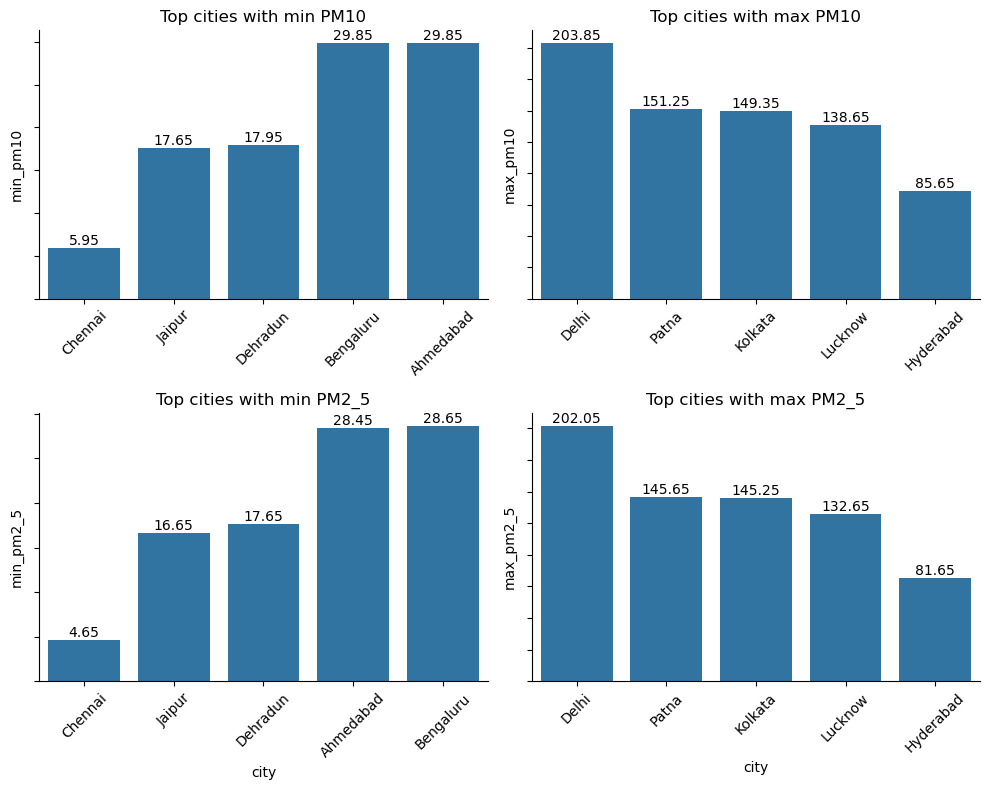

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.barplot(data=df_min_pm10, x='city',y='min_pm10', ax=axes[0,0])
axes[0,0].set_title("Top cities with min PM10")
axes[0,0].bar_label(axes[0,0].containers[0])

sns.barplot(data=df_max_pm10, x='city',y='max_pm10', ax=axes[0,1])
axes[0,1].set_title("Top cities with max PM10")
axes[0,1].bar_label(axes[0,1].containers[0])

sns.barplot(data=df_min_pm2_5, x='city',y='min_pm2_5', ax=axes[1,0])
axes[1,0].set_title("Top cities with min PM2_5")
axes[1,0].bar_label(axes[1,0].containers[0])

sns.barplot(data=df_max_pm2_5, x='city',y='max_pm2_5', ax=axes[1,1])
axes[1,1].set_title("Top cities with max PM2_5")
axes[1,1].bar_label(axes[1,1].containers[0])

for ax in axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45)

for ax in axes.flat:
    ax.set_yticklabels([])   # removes numbers

for ax in axes[0]:
    ax.set_xlabel('')

sns.despine()
plt.tight_layout()
plt.show()

In [16]:
df_avg_temp = pd.read_sql("""
SELECT
    city,
    ROUND(AVG(temperature)::numeric) AS avg_temp
FROM weather_data
GROUP BY city
ORDER BY avg_temp DESC
LIMIT 10""", engine)


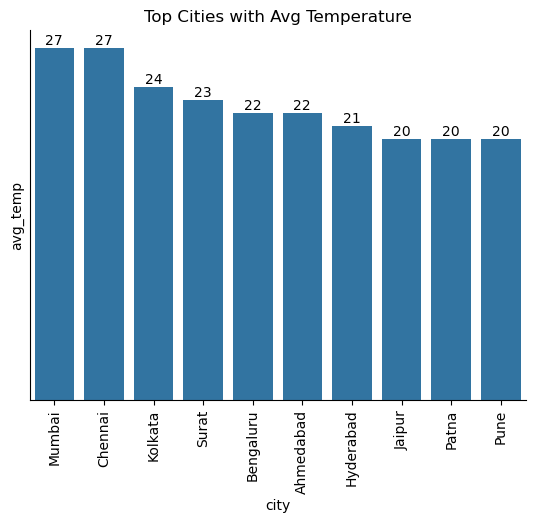

In [17]:
ax = sns.barplot(df_avg_temp, x='city', y='avg_temp')
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0])
ax.set_yticks([])
plt.title("Top Cities with Avg Temperature")
sns.despine()
plt.show()